In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/MachineLearning/Tugas/tugas3/"

In [3]:
# membaca file csv menggunakan pandas
import pandas as pd
df = pd.read_csv(path + '/data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
# Membagi dataset untuk training dan test
from sklearn.model_selection import train_test_split

# X = hanya kolom casual dan registered
X = df[['temp', 'hum']]
y = df['cnt']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# Lihat data training
X_train.head()


,temp,hum
548,0.781667,0.447083
115,0.631667,0.729167
272,0.564167,0.647500
65,0.261739,0.551304
232,0.710833,0.770000


In [22]:
# training model
from sklearn.linear_model import LinearRegression
# buat objek model instan dari clas linearRegression
model = LinearRegression()
#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):              ", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred) # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):            ",rmse)

Koefisien (kg per cm): 7121.095454477512
Intersep (kg):         2605.4446977716166
R2 (test):             0.28983831597498155
MAE (kg):               1289.9337105979712
RMSE (kg):             1603.9026580400525


In [24]:
# persamaan regresi
slope = model.coef_[0]
intercept =  model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 7121.095 * x + 2605.445


In [30]:
# Prediksi menggunakan model yang sudah dilatih
y_pred_test = model.predict(X_test)

# Buat tabel hasil lengkap
hasil = pd.DataFrame({
    "Temp": X_test["temp"].to_numpy(),      # fitur X pertama
    "Hum": X_test["hum"].to_numpy(),        # fitur X kedua
    "CNT Aktual": y_test.to_numpy(),
    "CNT Prediksi": y_pred_test
})

# Hitung selisih error
hasil["Error"] = hasil["CNT Prediksi"] - hasil["CNT Aktual"]

# Hitung akurasi per baris (%), dibatasi 0-100
denom = hasil["CNT Aktual"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Error"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan seluruh hasil
hasil

,Temp,Hum,CNT Aktual,CNT Prediksi,Error,Akurasi (%)
0,0.384167,0.905417,3228,2925.326243,-302.673757,90.623490
1,0.291667,0.786667,3959,2583.470344,-1375.529656,65.255629
2,0.580000,0.570000,7333,5214.821993,-2118.178007,71.114441
3,0.400833,0.683750,4068,3635.452114,-432.547886,89.367063
4,0.325000,0.613333,3613,3283.322753,-329.677247,90.875249
...,...,...,...,...,...,...
142,0.196364,0.437273,1349,2837.051889,1488.051889,0.000000
143,0.577500,0.520000,7767,5330.427857,-2436.572143,68.629173
144,0.442500,0.408333,6398,4667.026739,-1730.973261,72.945088
145,0.542500,0.542917,8555,5020.043017,-3534.956983,58.679638


In [34]:
# evaluasi model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

evaluasi_model = pd.DataFrame({
    "Metode": ["Koefisien (Temp)", "Koefisien (Hum)", "Intercept", "R²", "MAE", "RMSE"],
    "Nilai": [model.coef_[0], model.coef_[1], model.intercept_, r2, mae, rmse]
})

evaluasi_model


,Metode,Nilai
0,Koefisien (Temp),7121.095454
1,Koefisien (Hum),-2668.172049
2,Intercept,2605.444698
3,R²,0.289838
4,MAE,1289.933711
5,RMSE,1603.902658


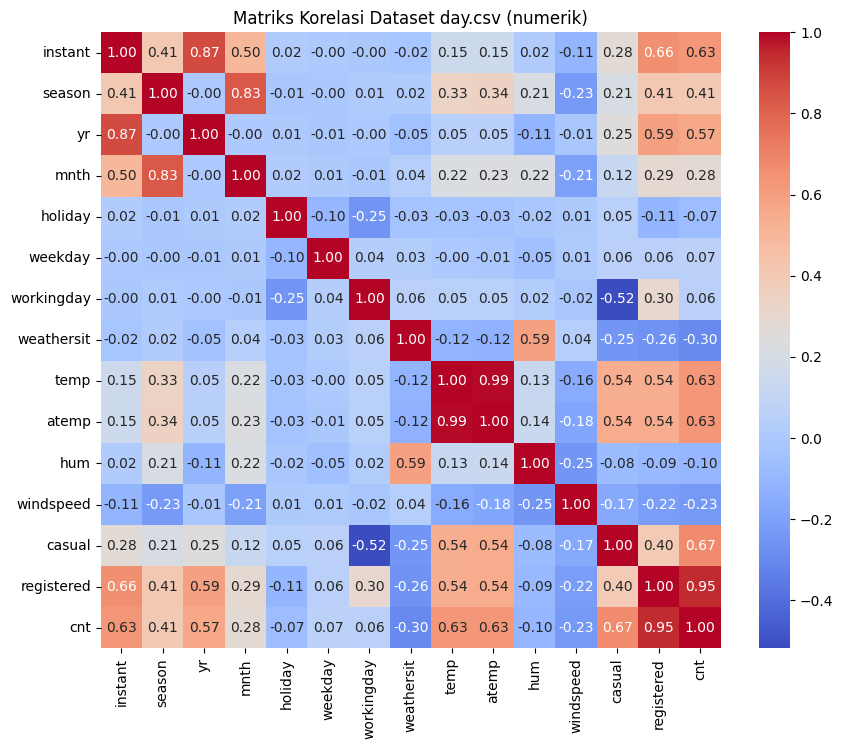

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=np.number)

# Hitung korelasi
corr_matrix = df_numeric.corr()

# Buat heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Dataset day.csv (numerik)")
plt.show()
